# Objective Functions

* https://github.com/JohnLangford/vowpal_wabbit/wiki/Loss-functions

| Loss | Minimizer | Example |
|:-----|:----------|:--------|
| MSE, MAE, RMSLE  | Expectation (mean) | Regression (Expected return on stock) |
| Logistic, Entropy, KL-Divergence | Probability | Classification (Probability of click on ad) |
| Hinge | 0 ~ 1 approximation | Classification (Is the digit a 7?) |
| Poisson | Counts (Log Mean) | Regression (Number of call events to call center) |

In [1]:
%pylab inline
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from scipy import stats
from scipy.spatial.distance import cosine as cosine_distantce

Populating the interactive namespace from numpy and matplotlib


## Data

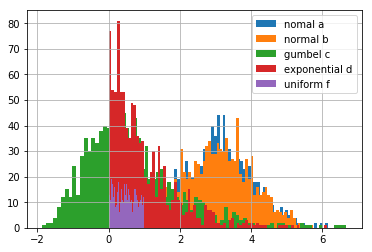

In [2]:
a = np.random.normal(loc=3, size=1000)
b = np.random.normal(loc=3, size=1000)
c = np.random.gumbel(size=1000)
d = np.random.exponential(size=1000)
f = np.random.uniform(size=1000)

hist(a, bins=80, label='nomal a')
hist(b, bins=80, label='normal b')
hist(c, bins=80, label='gumbel c')
hist(d, bins=80, label='exponential d')
hist(f, bins=80, label='uniform f')

grid()
legend()

In [30]:
def compare_distributions(func):
    print('normal_a, normal_a\t:', func(a, a))
    print('normal_a, normal_b\t:', func(a, b))
    print('normal_a, gumbel  \t:', func(a, c))
    print('normal_a, exponent\t:', func(a, d))
    print('normal_a, uniform \t:', func(a, f))
    
def display_graph(func, name='loss', start=-1, end=1):
    y = np.array([1])
    predictions = np.arange(start, end, 0.001)
    predictions[predictions == 0] = 1e-18
    
    r = [func(y, np.array([p])) if p != 0 else 1e-18 for p in predictions]
    
    title(name)
    xlabel(f'prediction value {start} ~ {end}')
    ylabel(f'{name} value')
    plot(predictions, r)
    grid()

## Mean Squared Error (MSE)

* http://mccormickml.com/2014/03/04/gradient-descent-derivation/

$$ J(\theta) = \frac{1}{N} \sum^{N}_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)}  \right)^2 $$

* $ J $ : cost function
* $ \theta $ : parameters (weights)
* N : training data의 갯수
* $ x^{(i)} $ : $ i^{th} $의 training input vector
* $ y^{(i)} $ : $ i^{th} $의 class label
* $ h_{\theta} \left( x^{(i)} \right) $ : $ \theta $를 사용하여 나온 $ i^{th} $ data에 대한 prediction


In [4]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def mean_squared_error(y, p):
    return ((y - p)**2).mean()

mean_squared_error(y, p)

0.054499995

In [5]:
metrics.mean_squared_error(y, p)

0.054499995

In [6]:
compare_distributions(mean_squared_error)

normal_a, normal_a	: 0.0
normal_a, normal_b	: 1.95422582075
normal_a, gumbel  	: 8.53230782101
normal_a, exponent	: 6.17767046729
normal_a, uniform 	: 7.55049095982


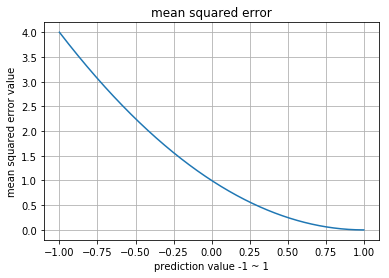

In [31]:
display_graph(metrics.mean_squared_error, 'mean squared error')

## Mean Absolute Error (MAE)

$$ J(\theta) = \frac{1}{N} \sum^{N}_{i=1} \left| h_{\theta}(x^{(i)}) - y^{(i)}  \right| $$

In [8]:
def mean_abolute_error(y, p):
    return np.abs(y-p).mean()

mean_abolute_error(y, p)

0.19

In [9]:
metrics.mean_absolute_error(y, p)

0.19

In [10]:
# Scipy도 동일함
compare_distributions(mean_abolute_error)

normal_a, normal_a	: 0.0
normal_a, normal_b	: 1.11654426401
normal_a, gumbel  	: 2.58843549527
normal_a, exponent	: 2.20789011894
normal_a, uniform 	: 2.55287060339


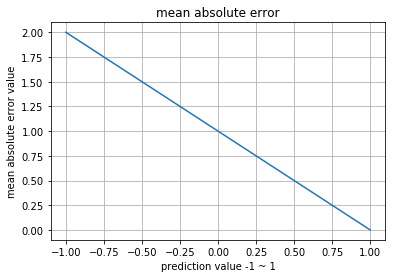

In [32]:
display_graph(metrics.mean_absolute_error, 'mean absolute error')

## Root Mean Squared Logarithmic Error (RMSLE)

$$ \epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [12]:
def mean_squared_logarithmic_error(y, p):
    try:
        l = lambda x: np.nan_to_num(np.log(x + 1))
        return np.sqrt(((l(p) - l(y))**2).mean())
    except Exception as e:
        print(p + 1)
        raise e

mean_squared_logarithmic_error(y, p)

0.16683918

In [13]:
compare_distributions(mean_squared_logarithmic_error)

normal_a, normal_a	: 0.0
normal_a, normal_b	: 0.374527773924
normal_a, gumbel  	: 1.47663258856
normal_a, exponent	: 0.917856836616
normal_a, uniform 	: 1.03344058128


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


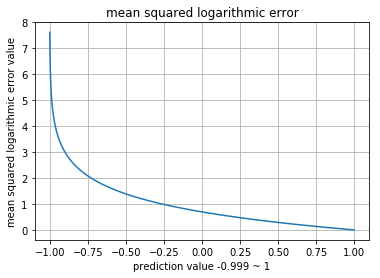

In [34]:
display_graph(mean_squared_logarithmic_error, 'mean squared logarithmic error', start=-0.999)

## Binary Cross Entropy (a.k.a Logarithmic Loss)

* https://www.kaggle.com/wiki/LogarithmicLoss

$$ \text{logloss} = -\frac{1}{N} \sum^{N}_{i=1} \left( y^{(i)} \cdot \log(p_i) + (1 - y) \cdot \log(1- p_i) )  \right) $$

binary cross entropy의 경우는 binary classfication에서 주로 사용이 됩니다.

In [15]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def binary_cross_entropy(y, p):
    return -(y * np.log(p) + (1-y) * np.log(1-p)).mean()

binary_cross_entropy(y, p)

0.22590299

In [16]:
# Scipy와 동일함
metrics.log_loss(y, p)

0.22590298801660538

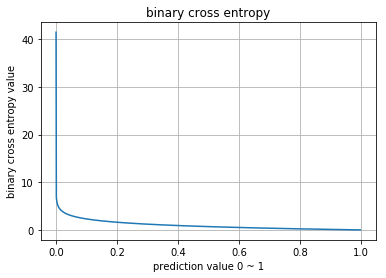

In [35]:
display_graph(binary_cross_entropy, 'binary cross entropy', start=0)

## Cross Entropy

* https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/

$$ H(y, \hat{y}) = - \sum_i y_i \log \hat{y}_1 $$

In [18]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def cross_entropy(y, p):
    return -(y * np.nan_to_num(np.log(p))).sum()

cross_entropy(y, p)

0.51082557

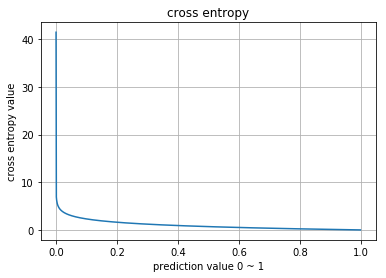

In [36]:
display_graph(binary_cross_entropy, 'cross entropy', start=0)

## Hinge Loss

logistic과 마찬가지로 binary classification에 사용됩니다.<br>
라이브러리 사용하면 알아서 처리되지만, 기본적으로 labels은 -1 또는 1이어야 합니다. 

$$ J(\theta) = max(0,\ 1 - y * f(x)) $$

In [20]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([-1, -1, -1, 1, -1], dtype=np.float32)

def hinge_loss(y, p):
    l = 1-(y*p)
    l[l<=0] = 0
    return l.mean()

hinge_loss(y, p)

0.98999995

In [21]:
metrics.hinge_loss(y, p)

0.98999999836087227

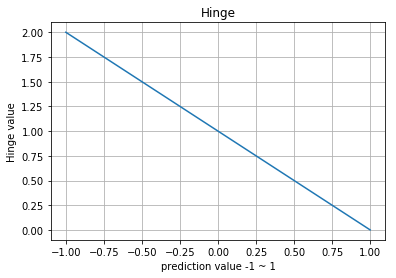

In [22]:
display_graph(hinge_loss, 'Hinge')

## KL-Divergence

$$ D_{KL}\left(p(x), q(x)\right) = \sum_{x \in X} p(x) \ln\frac{p(x)}{q(x)} $$

> 참고로.. Scipy.stats.entropy(a, b)를 사용하면 KL-Divergence를 사용하는 것과 마찬가지인데.. <br>
> 내부적으로 nan등 처리가 안되어 있어서 값이 안나옴

In [23]:
def kl_divergence(y, p):
    return np.sum(y * np.nan_to_num(np.log(y/p)), axis=0)

compare_distributions(kl_divergence)

normal_a, normal_a	: 0.0
normal_a, normal_b	: 363.568491488
normal_a, gumbel  	: 2615.4548795
normal_a, exponent	: 5385.28047443
normal_a, uniform 	: 6595.39665732


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


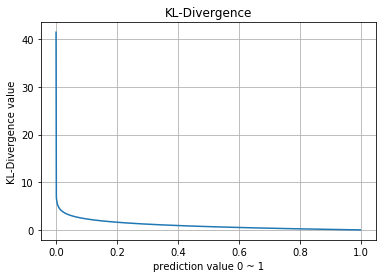

In [37]:
display_graph(kl_divergence, 'KL-Divergence', start=0)

## Cosine Proximity

* https://en.wikipedia.org/wiki/Cosine_similarity

$$ \text{similarity} = cos(\theta) = \frac{A \cdot B}{ \| A \|_2 \| B \|_2}  $$

In [25]:
def cosine_proximity(a, b):
    norm2 = lambda x: np.sqrt((x**2).sum())
    return 1 - (a * b).sum() / (norm2(a) * norm2(b))

cosine_proximity(np.array([0.3, 0.4]), np.array([1, 2]))

0.016130089900092459

In [26]:
compare_distributions(cosine_distantce)

normal_a, normal_a	: 5.55111512313e-16
normal_a, normal_b	: 0.0952074319172
normal_a, gumbel  	: 0.586622922564
normal_a, exponent	: 0.315703846687
normal_a, uniform 	: 0.172780844985


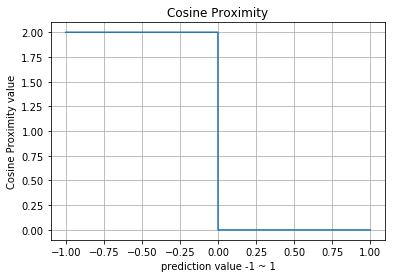

In [27]:
display_graph(cosine_proximity, 'Cosine Proximity')

## Poisson

* https://github.com/fchollet/keras/pull/479/commits/149d0e8d1871a7864fc2d582d6ce650512de371c

In [38]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

def poisson_loss(y, p):
    return (p - y * np.log(p)).mean()

poisson_loss(y, p)

0.33216509

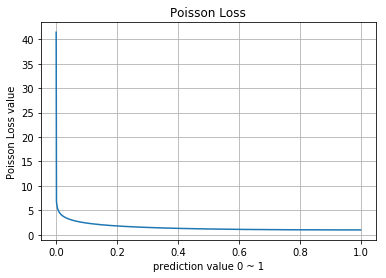

In [40]:
display_graph(poisson_loss, 'Poisson Loss', start=0)